In [1]:
import json
import pennylane as qml
import pennylane.numpy as np

In [272]:


dev = qml.device("default.qubit", wires=["e1", "e2", "e3", "e4", "result"], shots=1)
dev.operations.add("op")

wires = ["e1", "e2", "e3", "e4", "result"]


@qml.qnode(dev)
def circuit(project_execution):
    """This is the circuit we will use to detect which is the lazy worker. Remember 
    that we will only execute one shot.

    Args:
        project_execution (qml.ops): 
            The gate in charge of marking in the last qubit if the project has been finished
            as indicated in the statement.

    Returns:
        (numpy.tensor): Measurement output in the 5 qubits after a shot.
    """
    # Put your code here #

    wire_labels = ["e1","e2","e3","e4"]
    weights=np.zeros(16)
    weights[7]=0.5
    weights[11]=0.5
    weights[13]=0.5
    weights[14]=0.5

    # initialize
    qml.QubitStateVector(weights,wires=["e1","e2","e3","e4"])
    qml.PauliX("result")
    qml.Hadamard("result")

    project_execution(wires=wires)

    qml.PauliX(wires="e4") 
    qml.PauliX(wires="e3")
    qml.PauliX(wires="e2")
    qml.CNOT(["e1", "e2"])
    qml.CNOT(["e2", "e3"])
    qml.CNOT(["e3", "e4"])
    qml.ctrl(qml.Hadamard, control='e2')(wires='e3')
    qml.CRY(-2*np.arccos(1/np.sqrt(3)), wires=["e1","e2"])
    qml.RY(-2*np.pi/3, wires="e1")

    for i in wire_labels:
        qml.PauliX(wires=i)
    qml.MultiControlledX(["e1","e2","e3","e4"], "result")    # qc.mct([0,1,2,3],4)
    for i in wire_labels:
        qml.PauliX(wires=i)

    qml.RY(2*np.pi/3, wires="e1")
    qml.CRY(2*np.arccos(1/np.sqrt(3)), wires=["e1","e2"])
    qml.ctrl(qml.Hadamard, control='e2')(wires='e3')
    qml.CNOT(wires=["e3","e4"])
    qml.CNOT(wires=["e2","e3"])
    qml.CNOT(wires=["e1","e2"])
    qml.PauliX(wires="e2")
    qml.PauliX(wires="e3")
    qml.PauliX(wires="e4") 

    qml.Hadamard("result")
    qml.PauliX("result")

    # Put your code here #
    return qml.sample(wires=dev.wires)

def process_output(measurement):
    """This function will take the circuit measurement and process it to determine who is the lazy worker.

    Args:
        measurement (numpy.tensor): Measurement output in the 5 qubits after a shot.

    Returns:
        (str): This function must return "e1", "e2" "e3" or "e4" - the lazy worker.
    """
    # Put your code here #
    wire_labels = ["e1","e2","e3","e4"]
    for i,n in enumerate(measurement[:4]):
        if n==0:
            return wire_labels[i]

    

# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    return None

def check(solution_output: str, expected_output: str) -> None:
    samples = 5000

    solutions = []
    output = []

    for s in range(samples):
        lazy = np.random.randint(0, 4)
        no_lazy = list(range(4))
        no_lazy.pop(lazy)

        def project_execution(wires):
            class op(qml.operation.Operator):
                num_wires = 5

                def compute_decomposition(self, wires):
                    raise ValueError("You cant descompose this gate")

                def matrix(self):
                    m = np.zeros([32, 32])
                    for i in range(32):
                        b = [int(j) for j in bin(64 + i)[-5:]]
                        if sum(np.array(b)[no_lazy]) == 3:
                            if b[-1] == 0:
                                m[i, i + 1] = 1
                            else:
                                m[i, i - 1] = 1
                        else:
                            m[i, i] = 1
                    return m

            op(wires=wires)
            return None

        out = circuit(project_execution)
        solutions.append(lazy + 1)
        output.append(int(process_output(out)[-1]))

    assert np.allclose(
        output, solutions, rtol=1e-4
    ), "Your circuit does not give the correct output."

    ops = [op.name for op in circuit.tape.operations]
    assert ops.count("op") == 1, "You have used the oracle more than one time."


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...


/Users/emiliano_gr/opt/anaconda3/envs/app_qc/lib/python3.10/site-packages/pennylane/ops/qubit/non_parametric_ops.py:2289: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


Correct!


---------
# <center> Tests:


In [15]:
def draw_circuit_nice(function):
    import matplotlib.pyplot as plt
    #test_cases = [['[[0, 1], 0, 3]', '[-1.0,  1.0,  1.0,  1.0, -1.0, -1.0,  1.0,  1.0,  1.0]']]
    #state, error_key, qubit = json.loads(test_cases[0][0])
    qml.drawer.use_style("black_white")
    fig, ax = qml.draw_mpl(function)()
    plt.show()

In [270]:
@qml.qnode(dev)
def circuit():
    """This is the circuit we will use to detect which is the lazy worker. Remember 
    that we will only execute one shot.

    Args:
        project_execution (qml.ops): 
            The gate in charge of marking in the last qubit if the project has been finished
            as indicated in the statement.

    Returns:
        (numpy.tensor): Measurement output in the 5 qubits after a shot.
    """
    wire_labels = ["e1","e2","e3","e4"]
    weights=np.zeros(16)
    weights[7]=0.5
    weights[11]=0.5
    weights[13]=0.5
    weights[14]=0.5

    # initialize
    qml.QubitStateVector(weights,wires=["e1","e2","e3","e4"])
    qml.PauliX("result")
    qml.Hadamard("result")

    qml.MultiControlledX(wires=['e1', 'e2', 'e3', 'result'])

    qml.PauliX(wires="e4") 
    qml.PauliX(wires="e3")
    qml.PauliX(wires="e2")
    qml.CNOT(["e1", "e2"])
    qml.CNOT(["e2", "e3"])
    qml.CNOT(["e3", "e4"])
    qml.ctrl(qml.Hadamard, control='e2')(wires='e3')
    qml.CRY(-2*np.arccos(1/np.sqrt(3)), wires=["e1","e2"])
    qml.RY(-2*np.pi/3, wires="e1")

    for i in wire_labels:
        qml.PauliX(wires=i)
    qml.MultiControlledX(["e1","e2","e3","e4"], "result")    # qc.mct([0,1,2,3],4)
    for i in wire_labels:
        qml.PauliX(wires=i)

    qml.RY(2*np.pi/3, wires="e1")
    qml.CRY(2*np.arccos(1/np.sqrt(3)), wires=["e1","e2"])
    qml.ctrl(qml.Hadamard, control='e2')(wires='e3')
    qml.CNOT(wires=["e3","e4"])
    qml.CNOT(wires=["e2","e3"])
    qml.CNOT(wires=["e1","e2"])
    qml.PauliX(wires="e2")
    qml.PauliX(wires="e3")
    qml.PauliX(wires="e4") 

    qml.Hadamard("result")
    qml.PauliX("result")
    
    # Put your code here #
    return qml.sample(wires=dev.wires)

circuit()


/Users/emiliano_gr/opt/anaconda3/envs/app_qc/lib/python3.10/site-packages/pennylane/ops/qubit/non_parametric_ops.py:2289: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


tensor([1, 1, 1, 0, 0], requires_grad=True)

In [244]:
wire_labels = ["e1","e2","e3","e4"]
for i,n in enumerate(tensor[:4]):
    if n==0:
        print(wire_labels[i])

e3


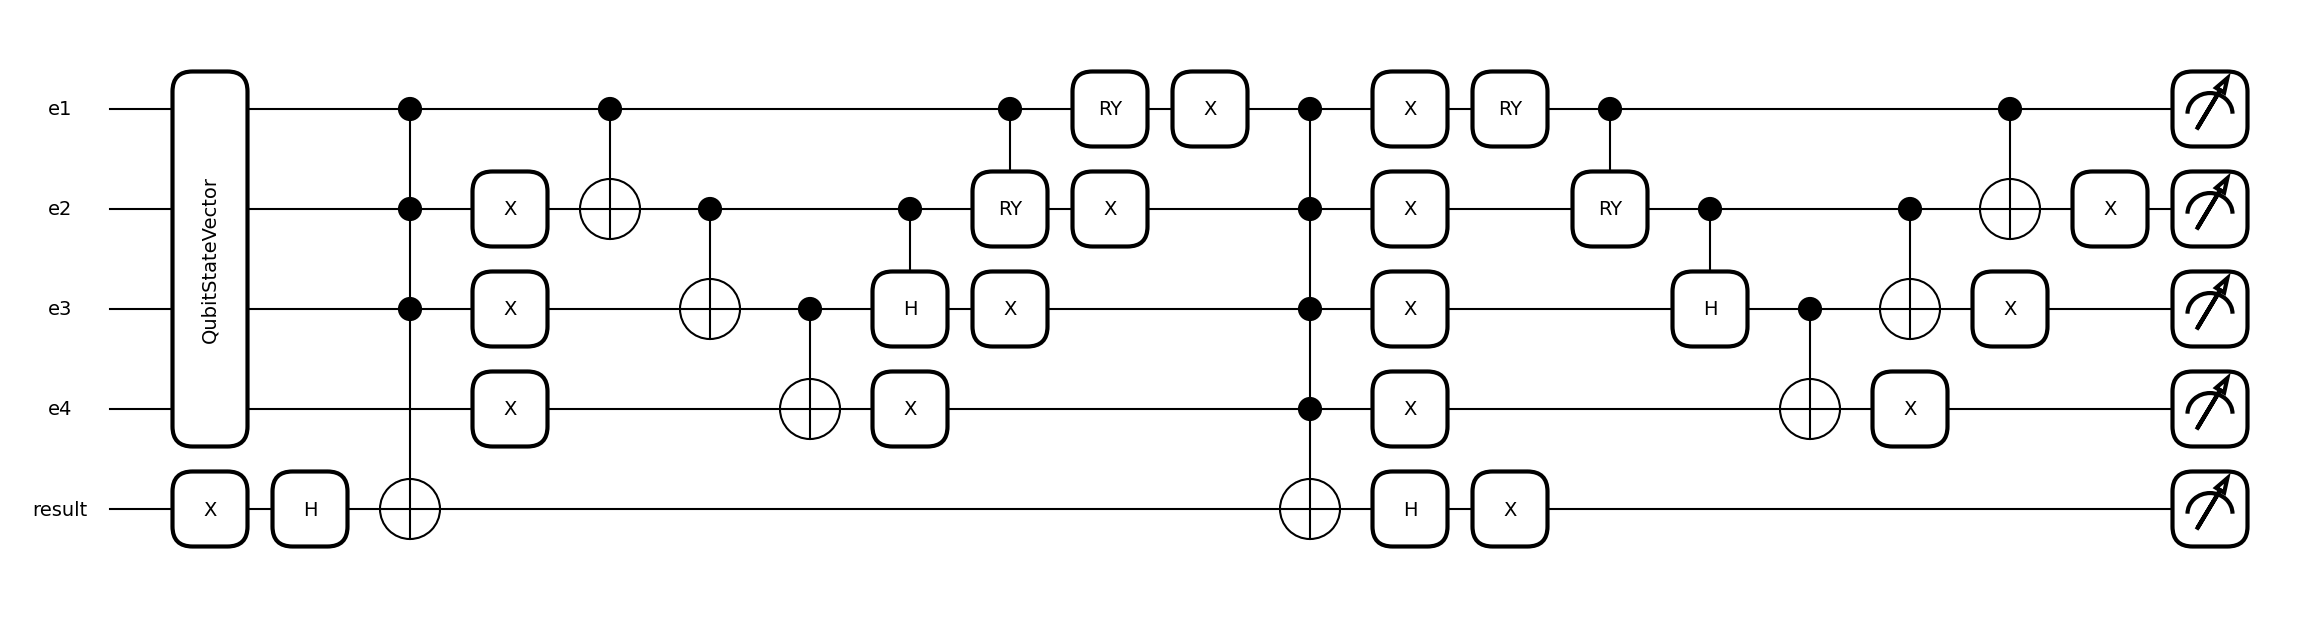

In [271]:
draw_circuit_nice(circuit)

In [190]:
from qiskit import transpile, QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit import Gate

from qiskit.circuit.library import HGate

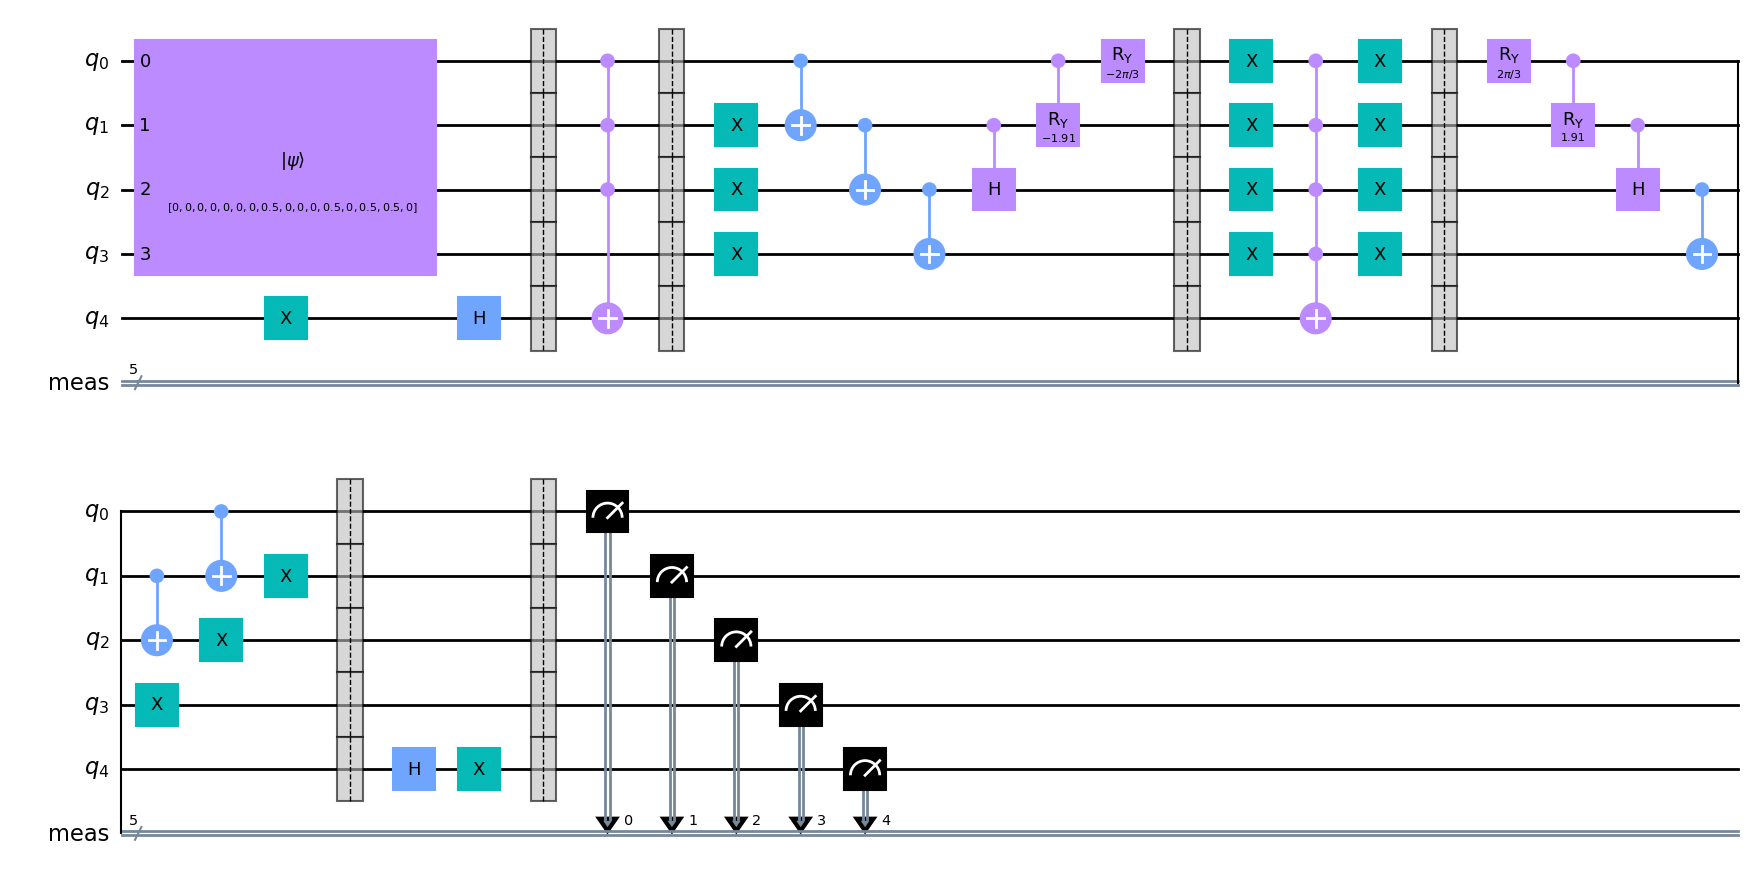

In [264]:
num_qubits = 5
desired_state = [0]*2**(num_qubits-1)
for i in [7,11,13,14]:
    desired_state[i] = 0.5
ch = HGate().control(1)
  

qc = QuantumCircuit(num_qubits)

qc.initialize(desired_state, range(num_qubits-1))
qc.x(-1)
qc.h(-1)


# for i in range(1):
qc.barrier()
qc.mct([0,1,2],4) # lazy is the missing one: 2 here
qc.barrier()


qc.x([1,2,3])
qc.cnot(0,1)
qc.cnot(1,2)
qc.cnot(2,3)
qc.append(ch, [1,2])
qc.cry(-2*np.arccos(1/np.sqrt(3)), 0,1)
qc.ry(-2*np.pi/3,0)

qc.barrier()
qc.x(range(num_qubits-1))
qc.mct([0,1,2,3],4)
qc.x(range(num_qubits-1))
qc.barrier()

qc.ry(2*np.pi/3,0)
qc.cry(2*np.arccos(1/np.sqrt(3)), 0,1)
qc.append(ch, [1,2])
qc.cnot(2,3)
qc.cnot(1,2)
qc.cnot(0,1)
qc.x([1,2,3])

qc.barrier()
qc.h(-1)
qc.x(-1)
qc.measure_all()
qc.draw('mpl')

{'00111': 1000}


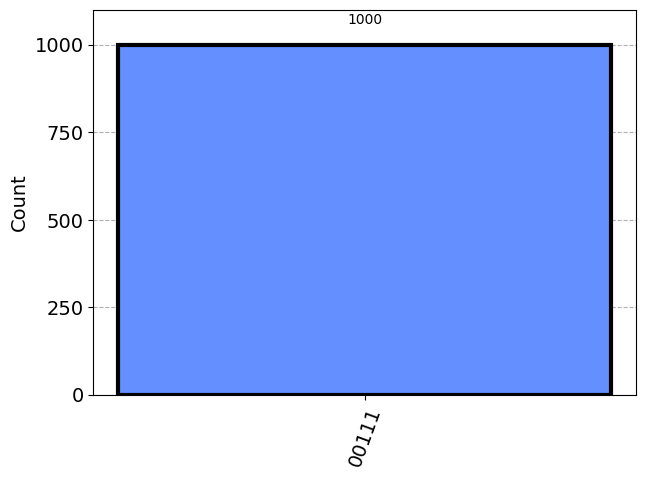

In [265]:
backend = BasicAer.get_backend('qasm_simulator')
#qc = transpile(qc, backend)
job = execute(qc, shots=1000, backend=backend)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [165]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
import numpy as np

psi = np.array(desired_state)
matrix = 2*np.outer(psi, psi) - np.eye(2**4)
# Define the matrix that represents the gate
#matrix = np.array([[1, 0], [0, -1]])

# Create a custom gate object from the matrix
my_gate = Gate(name='MyGate', num_qubits=4, params=[], label=None)
my_gate.definition = [np.around(matrix, decimals=15)]

# Create a QuantumCircuit and add the custom gate to it
qc = QuantumCircuit(4)
qc.append(my_gate, [0,1,2,3])

# Draw the circuit to verify that the gate was added correctly
print(qc.draw())

     ┌─────────┐
q_0: ┤0        ├
     │         │
q_1: ┤1        ├
     │  MyGate │
q_2: ┤2        ├
     │         │
q_3: ┤3        ├
     └─────────┘


In [166]:
matrix@matrix.conj().T

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [172]:
matrix

array([[-1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ,
         0.5,  0. ,  0.5,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0. ,  0. ,
         0. ,  0. ,  0

# Resources:
- pennylane grover (not used)
https://docs.pennylane.ai/en/stable/code/api/pennylane.GroverOperator.html
- multi controlled not
https://docs.pennylane.ai/en/stable/code/api/pennylane.MultiControlledX.html
- qiskit (for inspiration)
https://qiskit.org/textbook/ch-algorithms/grover.html
- qiskit also good:
https://qiskit.org/documentation/tutorials/algorithms/06_grover.html
- diffusion operator:
    > We will do the transformation that turns |s⟩ into the all-zeroes vector |000..0⟩, and invert anything that is not |000..0⟩, before transforming back again
- https://cnot.io/quantum_algorithms/grover/grovers_algorithm.html